In [4]:
import pandas as pd
from google.colab import drive

def load_train_data():
    drive.mount('/content/drive')
    datadir = "/content/drive/MyDrive/CS441/24SP/FinalProject/"
    Train = pd.read_csv(datadir + 'train.csv')
    return Train


Train = load_train_data()

Mounted at /content/drive


In [24]:
Train.shape

(7613, 2)

In [5]:

Train.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
Train.head()
print

<function print>

In [6]:
def load_test_data():
    drive.mount('/content/drive')
    datadir = "/content/drive/MyDrive/CS441/24SP/FinalProject/"
    Test = pd.read_csv(datadir + 'test.csv')
    return Test
Test = load_test_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
Test.shape

(3263, 2)

In [7]:
Test.drop(['keyword', 'location'], axis = 1, inplace=True)
Test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


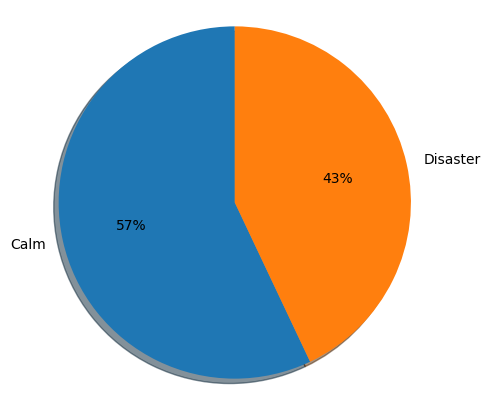

In [8]:
import matplotlib.pyplot as plt

calm, disaster = Train['target'].value_counts()
calm, disaster

fig = plt.figure(figsize=(5,5))
labels = 'Calm', 'Disaster'
sizes = [calm, disaster]
plt.pie(sizes, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [9]:
from nltk.corpus import stopwords
import re
import string

In [10]:
def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

Train['text'] = Train['text'].apply(lambda x : change_contraction_verb(x))
Test['text'] = Test['text'].apply(lambda x : change_contraction_verb(x))

Train['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [11]:
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
Train['text'] = Train['text'].apply(lambda x : custom_preprocessor(x))
Test['text'] = Test['text'].apply(lambda x : custom_preprocessor(x))

Train['text'].head(10)

0    our deeds are the reason of this  earthquake m...
1               forest fire near la ronge sask  canada
2    all residents asked to  ishelter in place  are...
3      people receive  wildfires evacuation orders ...
4    just got sent this photo from ruby  alaska as ...
5     rockyfire update    california hwy   closed i...
6     flood  disaster heavy rain causes flash flood...
7    i am on top of the hill and i can see a fire i...
8    there is an emergency evacuation happening now...
9    i am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [13]:
import re

def remove_emojis(text):
    # Define a regular expression to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Remove emojis using the regular expression
    return emoji_pattern.sub(r'', text)

In [14]:
Train['text'] = Train['text'].apply(lambda x : remove_emojis(x))
Test['text'] = Test['text'].apply(lambda x : remove_emojis(x))

In [15]:
Train.head(10)

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to ishelter in place are...,1
3,people receive wildfires evacuation orders ...,1
4,just got sent this photo from ruby alaska as ...,1
5,rockyfire update california hwy closed i...,1
6,flood disaster heavy rain causes flash flood...,1
7,i am on top of the hill and i can see a fire i...,1
8,there is an emergency evacuation happening now...,1
9,i am afraid that the tornado is coming to our ...,1


In [16]:
Test.head(10)

,id,text
0,0,just happened a terrible car crash
1,2,heard about earthquake is different cities s...
2,3,there is a forest fire at spot pond geese are...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills in china and taiwan
5,12,we are shaking it is an earthquake
6,21,they would probably still show more life than ...
7,22,hey how are you
8,27,what a nice hat
9,29,fuck off


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)

In [18]:
tfidfvectorizer.fit(Train['text'])
tfidf_train = tfidfvectorizer.transform(Train['text'])
tfidf_term_vectors  = tfidfvectorizer.transform(Test['text'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_val, y_train, y_val = train_test_split(tfidf_train, Train['target'], test_size=0.2, random_state=42)

In [26]:
X_train.shape

(6090, 16325)

In [27]:
X_val.shape

(1523, 16325)

In [20]:
#My Code
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text) if text is not None else ''

    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.lower()
    return text
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.8, preprocessor=preprocess_text)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_val = vectorizer.transform(X_val)
tfidf_test = vectorizer.transform(tfidf_term_vectors)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('svm', SVC(random_state=42))
])
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.5, 0.75, 0.95],
    'tfidf__min_df': [1, 5],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function preprocess_text at 0x7eddc9329e10>)),
                                       ('svm', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf'],
                         'tfidf__max_df': [0.5, 0.75, 0.95],
                         'tfidf__min_df': [1, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [22]:
predictions_val = grid_search.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Results:")
print(classification_report(y_val, predictions_val))
print("Accuracy:", accuracy_score(y_val, predictions_val))

# Predictions on the test set
predictions_test = grid_search.predict(tfidf_term_vectors)

Validation Set Results:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy: 0.7984241628365069


In [23]:
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'svm__C': 1, 'svm__kernel': 'rbf', 'tfidf__max_df': 0.5, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 1)}


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm', SVC(kernel='linear', C=1.0, random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x78b6238a48b0>)),
                ('scaler', StandardScaler(with_mean=False)),
                ('svm', SVC(kernel='linear', random_state=42))])

In [26]:
predictions_val = pipeline.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Results:")
print(classification_report(y_val, predictions_val))
print("Accuracy:", accuracy_score(y_val, predictions_val))

# Predictions on the test set
predictions_test = pipeline.predict(tfidf_term_vectors)

Validation Set Results:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       874
           1       0.79      0.66      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Accuracy: 0.7793827971109653


In [20]:
#SVM Model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(tfidf_train, y_train)
predictions_val = svm_model.predict(tfidf_val)

In [21]:
# Evaluate the model on the validation set
print("Validation Set Results:")
print(classification_report(y_val, predictions_val))
print("Accuracy:", accuracy_score(y_val, predictions_val))

# Predictions on the test set
predictions_test = svm_model.predict(tfidf_test)

Validation Set Results:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1       0.77      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.79      0.78      1523

Accuracy: 0.7852921864740644


In [22]:
# Create a Logistic Regression model with regularization parameter C=0.1
model = LogisticRegression(C=0.1)

model.fit(X_train, y_train)

predictions_val = model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Results:")
print(classification_report(y_val, predictions_val))
print("Accuracy:", accuracy_score(y_val, predictions_val))

# Predictions on the test set
predictions_test = model.predict(tfidf_term_vectors)

Validation Set Results:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       874
           1       0.95      0.34      0.50       649

    accuracy                           0.71      1523
   macro avg       0.81      0.66      0.65      1523
weighted avg       0.79      0.71      0.67      1523

Accuracy: 0.7117531188443861


In [27]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x78b6238a48b0>)),
                ('rf', RandomForestClassifier(random_state=42))])

In [28]:
param_grid_rf = {
    'tfidf__max_df': [0.5, 0.75, 0.95],
    'tfidf__min_df': [1, 3, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function preprocess_text at 0x78b6238a48b0>)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__n_estimators': [100, 200, 300],
                         'tfidf__max_df': [0.5, 0.75, 0.95],
                         'tfidf__min_df': [1, 3, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [29]:
predictions_val = grid_search_rf.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Results:")
print(classification_report(y_val, predictions_val))
print("Accuracy:", accuracy_score(y_val, predictions_val))

# Predictions on the test set
predictions_test = pipeline.predict(tfidf_term_vectors)

Validation Set Results:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       874
           1       0.80      0.65      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.78      1523

Accuracy: 0.7826657912015759
